# CMSE 201 Final Project

#### CMSE 201 Final Project
### &#9989; James Fletcher
### &#9989; Section_002
#### &#9989; 12-7-2022

# ___How Has the Introduction of the 3-pointer Changed Basketball___

## Background and Motivation

The NBA is an ever changing landscape. The style of the game can change very quickly. Arguably the most drastic change is when, in 1979, the NBA added a 3 point line to the court. For the first time ever, there was a different kind of shot to take.When the NBA added a new type of shot, the three-point shot. Today, it is a crucial facet to the game of basketball. It has cahnged the way we think of certain shots. For example, the long two pointer. Metrics show just how ineffecient it is compared to a three. When the shot was first introduced, however, it wasn't so smooth a transition. There were coaches that at first wouldn't utilize the three unless they were desperate for points and losing by a wide margin[1]. That's something most couldn't imagine in todays game. 

With all the anecdotal evidence, I wanted to see how the game has changed since the three was added by looking at and comparing different average statistics across seasons in the NBA.

## Methodology

The source of my data is a CSV that has NBA player statistics from 1950-2017[3]. The source of the CSV is from basketball-reference[4]. The data contains season stats such as points, rebounds, steals, as well as shooting percentages.

In [81]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [82]:
# load data
nba_player_statistics = pd.read_csv('Seasons_stats.csv')

# check data loaded properly
nba_player_statistics.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [83]:
# define functions to clean and visualize data

def clean(stats):
    '''takes dataset and filters columns we want.
    creates lists of the columns and player positions
    for use later. we only want years where the 3 was
    around. creates array of years.'''
    
    new_stats = stats[['Year', 'MP', 'Pos','DRB','ORB', 'PTS', 'FT', 'FTA', 'FT%', 'FG', 'FG%', '3P', '3PA', '3P%', '3PAr', '2P', '2PA', '2P%']]
    
    stat_columns = ['MP', 'DRB','ORB', 'PTS', 'FT', 'FTA', 'FT%'\
                       ,'FG', 'FG%', '3P', '3PA', '3P%', '3PAr', '2P', '2PA', '2P%']
    
    POS = ['PointGaurds', 'ShootingGaurds', 'SmallForwards', 'PowerForwards', 'Centers']
    
    # only consider 3 point years
    years = np.arange(1980, 2018, 1)
    return new_stats, years, stat_columns, POS

def seasons(stats, year):
    '''grabs a seasons worth of statistics'''
    
    season_stats = stats.loc[stats['Year'] == year]
    
    return season_stats

def avg(season_stats, stat_columns):
    '''accepts a seasons worth of stats, 
    and finds the NBA average for each.'''
    
    season_avgs = []
    
    for column in stat_columns:
        avg_stats = season_stats[column].mean()
        season_avgs.append(avg_stats)
    
    return season_avgs

def master_averages(stats, years, stat_columns):
    '''creates dictionary and pandas df of the
    NBA average for each stat per season.'''
    
    # create dictionary
    master_avgs = {}
    
    for year in years:
        season_stats = seasons(stats, year)
        season_avgs = avg(season_stats, stat_columns)
        master_avgs[year] = season_avgs
    
    master_data = pd.DataFrame(master_avgs).T
    master_data.columns = stat_columns
    
        
    return master_avgs, master_data

def stat_avgs(master_avgs, stat_index):
    '''accepts the master_avgs dictionary,
    and index of stat interested in. finds
    NBA average of stat for every season.'''
    
    all_time_avgs = []
    for key in master_avgs:
        season_avg = master_avgs[key][stat_index]
        all_time_avgs.append(season_avg)
        
    return all_time_avgs

def get_positions(stats):
    
    # drop rows with no position
    stats = stats[stats.Pos != 'NaN']
    pg_stats = stats.loc[stats['Pos'] == 'PG']
    sg_stats = stats.loc[stats['Pos'] == 'SG']
    sf_stats = stats.loc[stats['Pos'] == 'SF']
    pf_stats = stats.loc[stats['Pos'] == 'PF']
    c_stats = stats.loc[stats['Pos'] == 'C']
    
    return pg_stats, sg_stats, sf_stats, pf_stats, c_stats

def plot_avgs(master_avgs, stat_columns, years):
    '''plots NBA averages of all stats for every season.'''
    
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'tab:olive', 'tab:pink',\
              'tab:brown', 'tab:purple', 'aquamarine', 'xkcd:sky blue',\
             'tab:blue', 'tab:red', 'tab:orange', 'tab:green']
    c_ind = 0
    
    count = 0
    
    fig1 = plt.figure(figsize = (12,12))
    fig1.suptitle('Player Averages Per Season in the NBA')
    
    for i in range(len(stat_columns)):
        avgs = stat_avgs(master_avgs, i)
        count += 1
        plt.subplot(8,2,count)
        plt.plot(years, avgs, color = colors[c_ind])
        c_ind += 1
        plt.xlabel('Year')
        plt.ylabel(stat_columns[i])
        plt.title(stat_columns[i] + ' per season')
        plt.tight_layout()
    
    return fig1

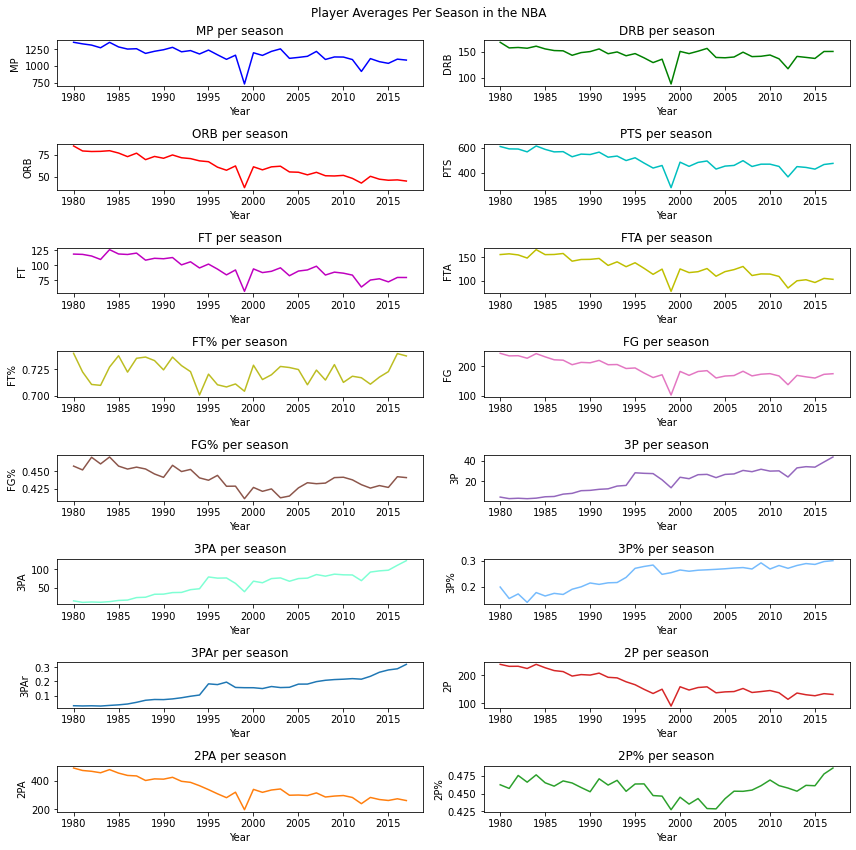

In [84]:
# generate initial plots

# clean data function
stats, years, stat_columns, POS = clean(nba_player_statistics)
    
# dictionnary function
master_avgs, master_data = master_averages(stats, years, stat_columns)
    
# plot
fig1 = plot_avgs(master_avgs, stat_columns, years)


There are a few takeaways from this figure. We can confirm that the three-pointer has increased overall. Looking at possible relationships, it makes sense intuitively that if 3P per season increases, 2P per season is going to decrease. One thing to note is the frequent dips in 1999. There was a lockout, and the season ws shortened to 50 games from its usual 82.

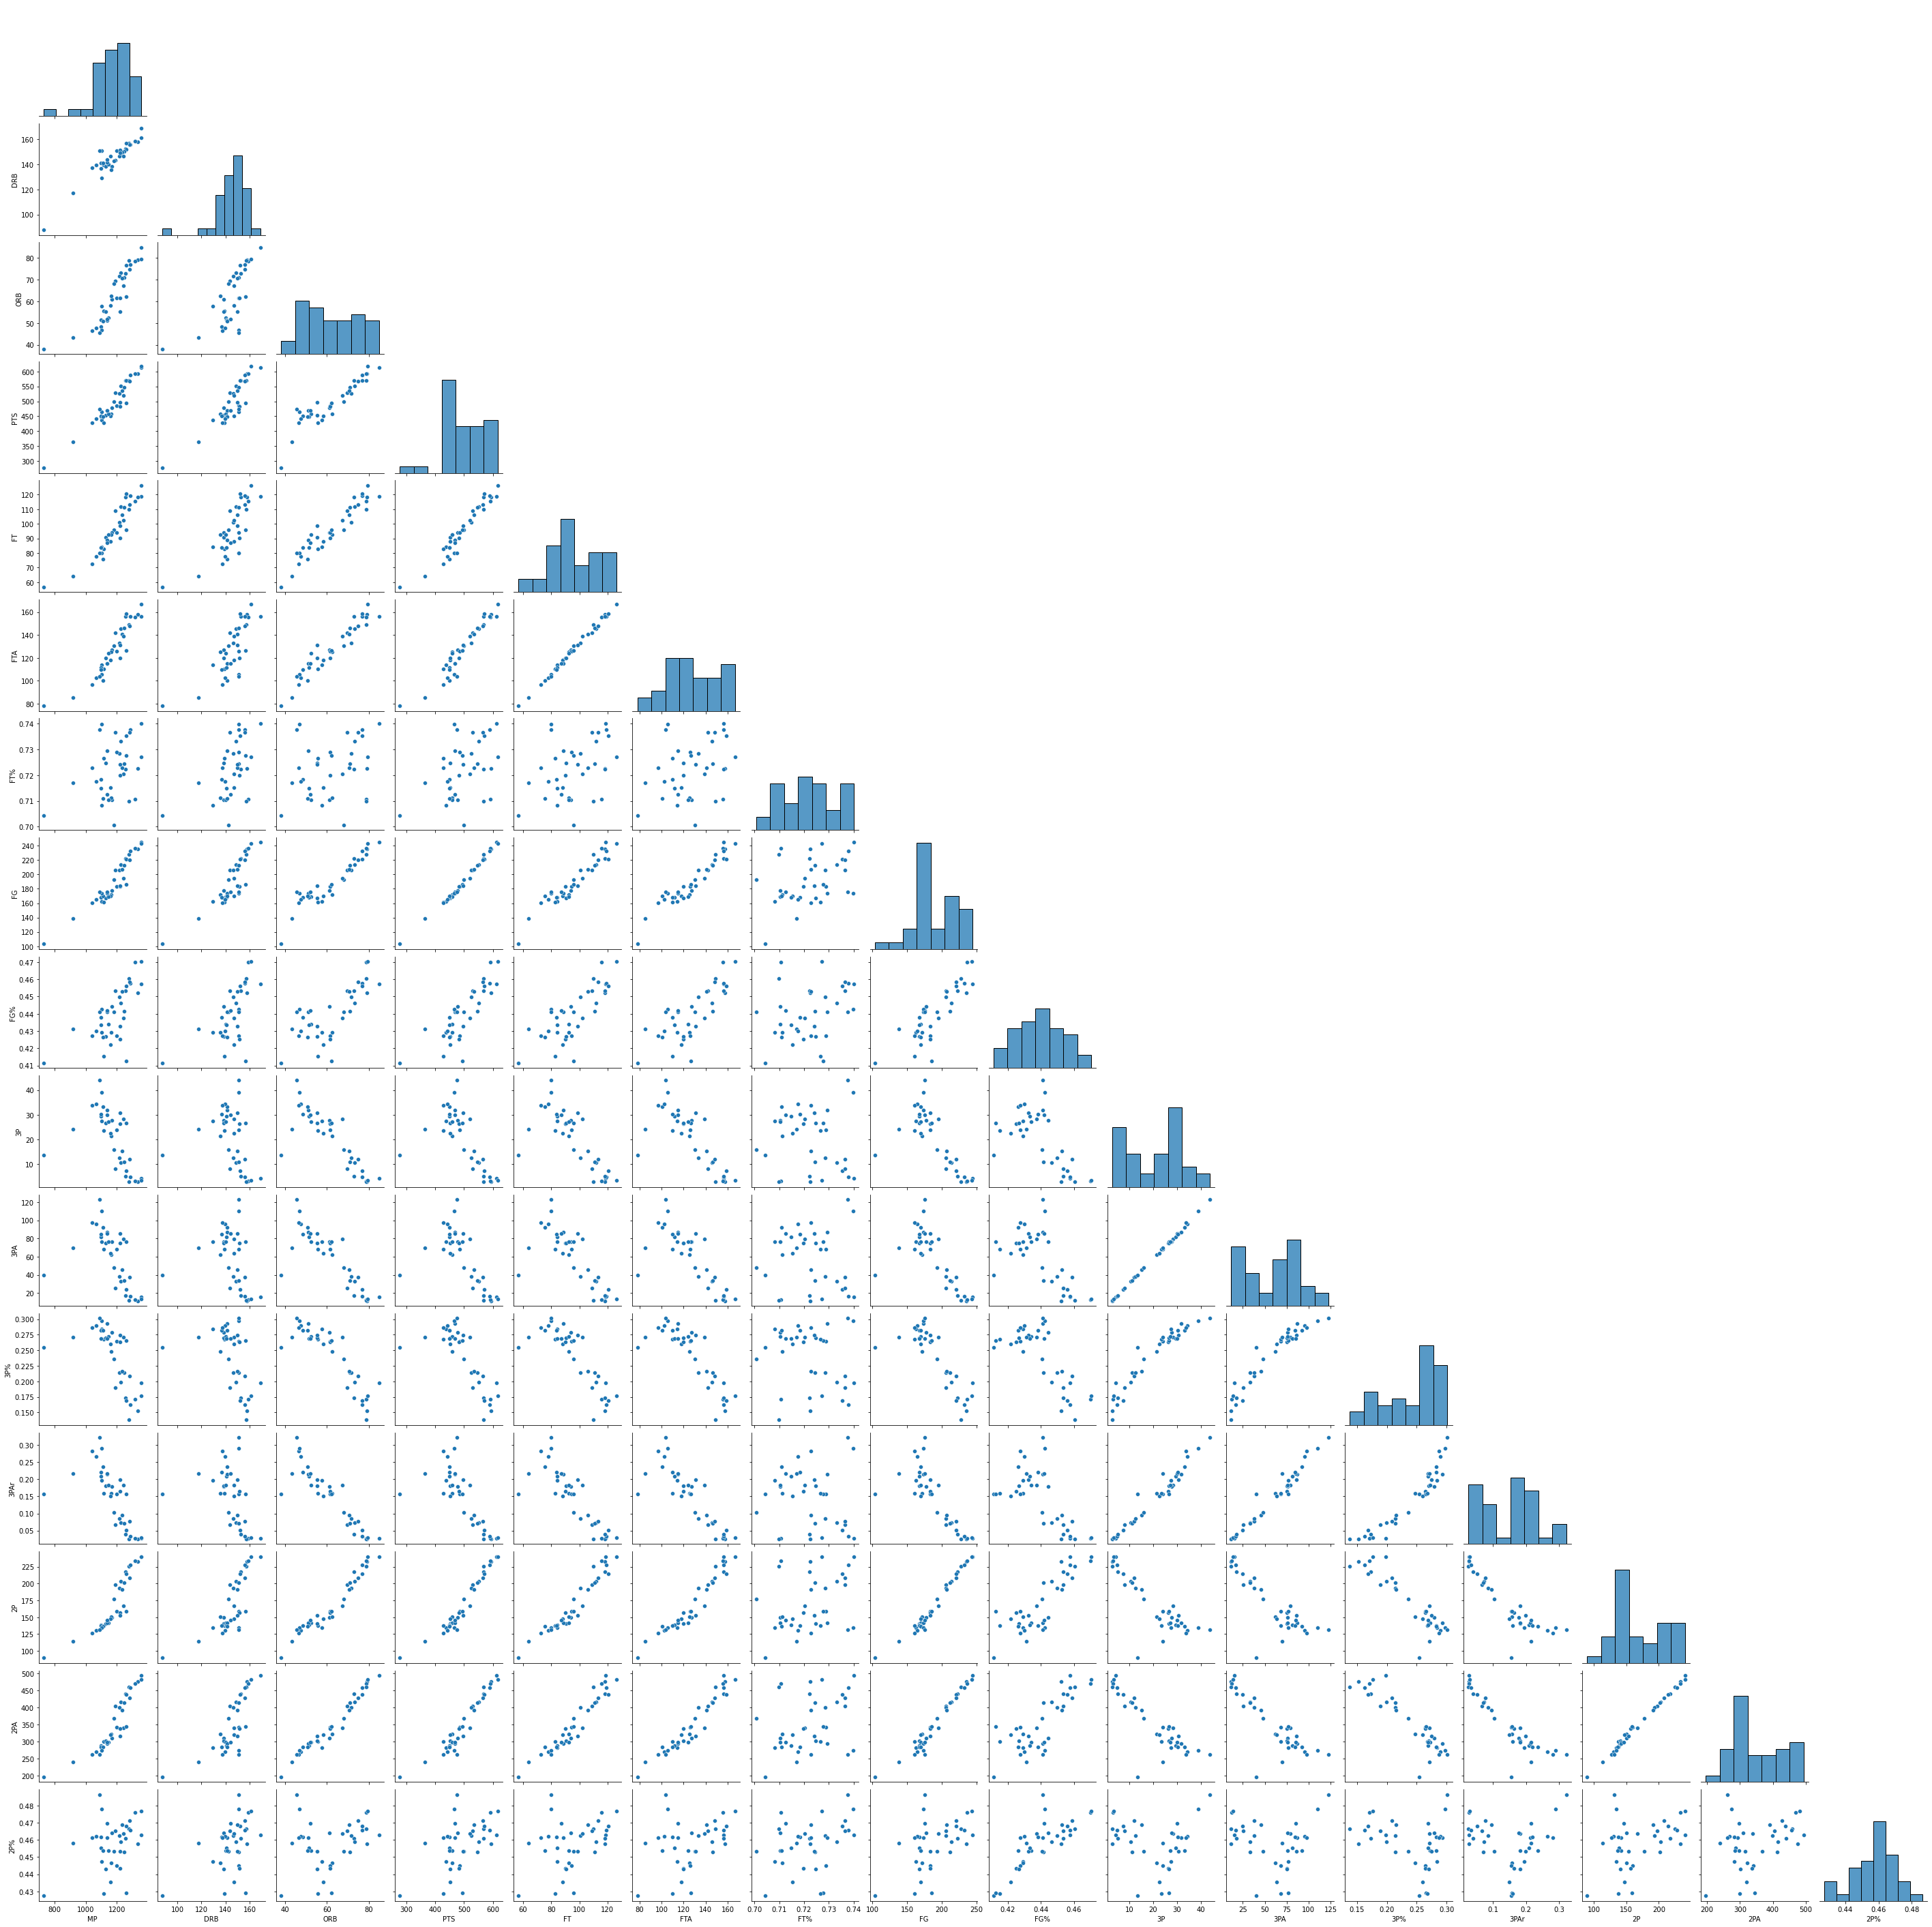

In [85]:
# use pairplot to check correlations between data
sns.pairplot(master_data, corner = True)

From the pairplot we can see some correlations. There is a negative correlation between 2-point and 3-point statistics, which is what was predicted from the graphs. There are also negative correlations between offensive rebounds and 3s taken, which indicates offensive rebounding is less efficient when taking 3s. Next we will look at averages by position.

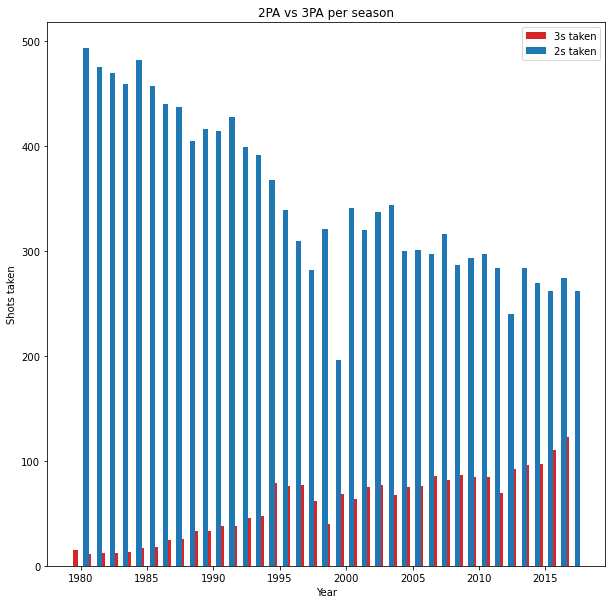

In [86]:
# plot 2s attempted vs 3s attempted
fig2 = plt.figure(figsize = (10,10))
plt.bar(years-0.4, master_data['3PA'], 0.4, color = 'tab:red', label = '3s taken')
plt.bar(years+0.4, master_data['2PA'], 0.4, color = 'tab:blue', label = '2s taken')
plt.xlabel('Year')
plt.ylabel('Shots taken')
plt.title('2PA vs 3PA per season')
plt.legend()
plt.show()

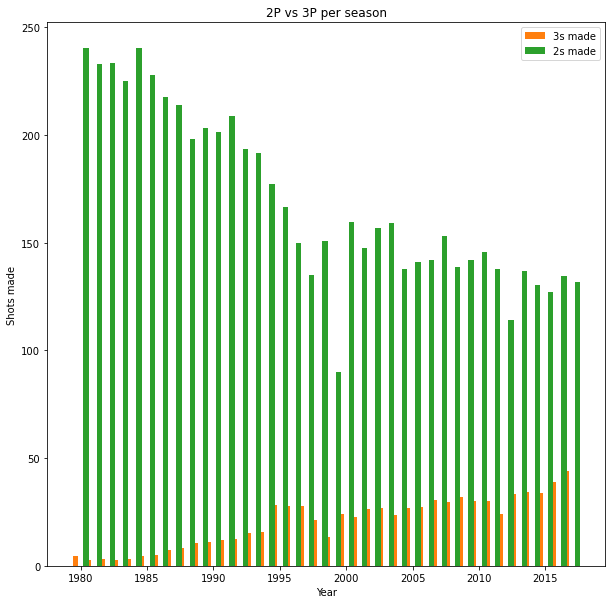

In [87]:
# plot 2s made vs 3s made
fig3 = plt.figure(figsize = (10,10))
plt.bar(years-0.4, master_data['3P'], 0.4, color = 'tab:orange', label = '3s made')
plt.bar(years+0.4, master_data['2P'], 0.4, color = 'tab:green', label = '2s made')
plt.xlabel('Year')
plt.ylabel('Shots made')
plt.title('2P vs 3P per season')
plt.legend()
plt.show()

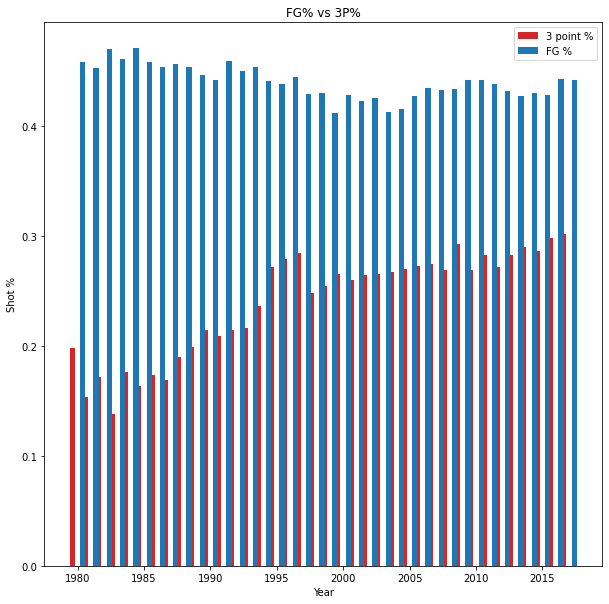

In [88]:
# plot FG% vs 3P%
fig4 = plt.figure(figsize = (10,10))
plt.bar(years-0.4, master_data['3P%'], 0.4, color = 'tab:red', label = '3 point %')
plt.bar(years+0.4, master_data['FG%'], 0.4, color = 'tab:blue', label = 'FG %')
plt.xlabel('Year')
plt.ylabel('Shot %')
plt.title('FG% vs 3P%')
plt.legend()
plt.show()

From the graphs we can see that as 3s have increased, 2s have decreaed. Now we will visualize with pie charts to get a better understanding of the magnitude of change.

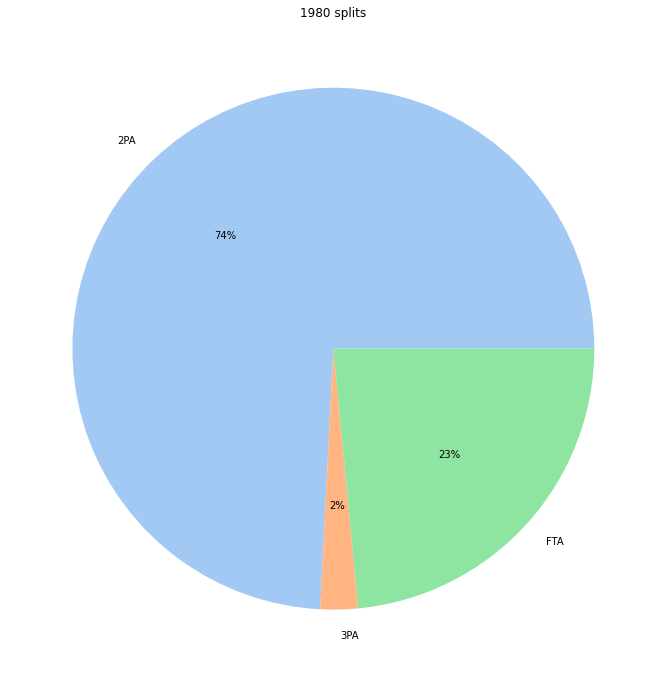

In [89]:
# colors to use, from folkstalk.com[5]
colors = sns.color_palette('pastel')[0:5]


# 1980
fig5 = plt.figure(figsize = (12,12))
stats80 = master_data.iloc[0]
stats_80 = stats80[['2PA', '3PA', 'FTA']]

plt.pie(stats_80, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1980 splits')
plt.show()

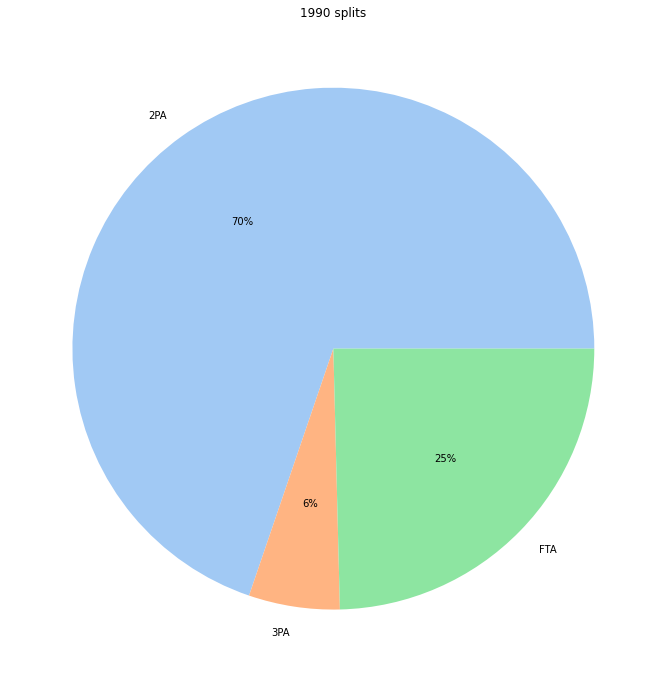

In [90]:
# 1990
fig6 = plt.figure(figsize = (12,12))
stats90 = master_data.iloc[10]
stats_90 = stats90[['2PA', '3PA', 'FTA']]

plt.pie(stats_90, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1990 splits')
plt.show()

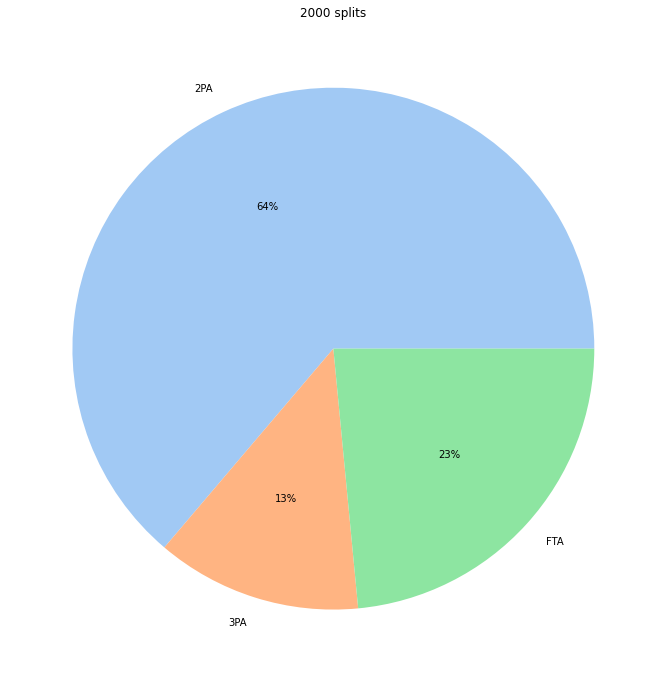

In [91]:
# 2000
fig7 = plt.figure(figsize = (12,12))
stats00 = master_data.iloc[20]
stats_00 = stats00[['2PA', '3PA', 'FTA']]

plt.pie(stats_00, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2000 splits')
plt.show()

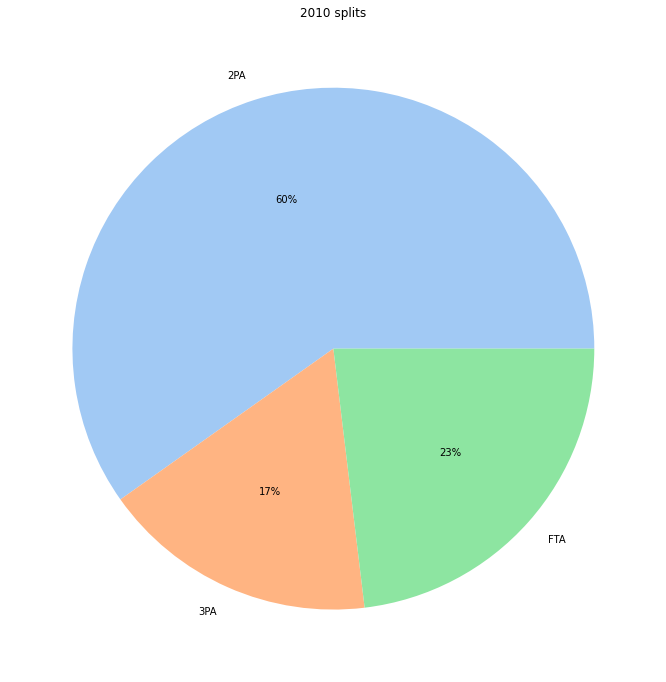

In [92]:
# 2010
fig8 = plt.figure(figsize = (12,12))
stats10 = master_data.iloc[30]
stats_10 = stats10[['2PA', '3PA', 'FTA']]

plt.pie(stats_10, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2010 splits')
plt.show()

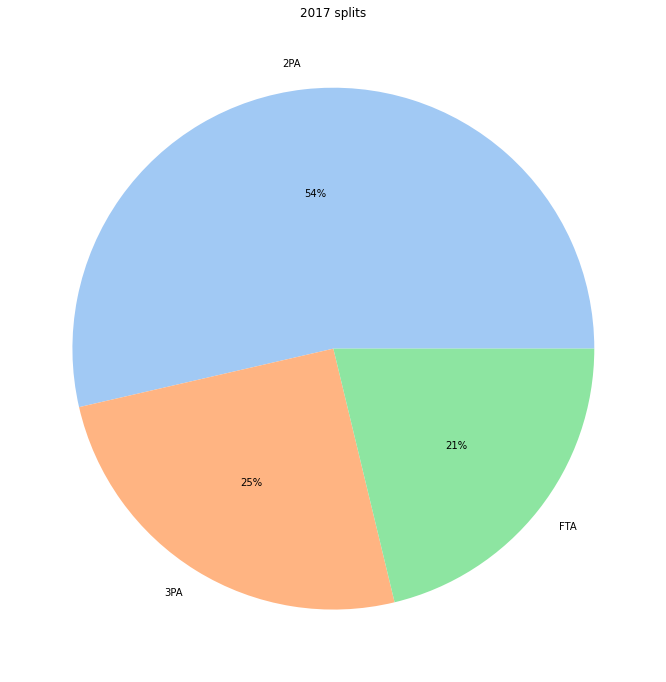

In [93]:
# 2017
fig9 = plt.figure(figsize = (12,12))
stats17 = master_data.iloc[-1]
stats_17 = stats17[['2PA', '3PA', 'FTA']]

plt.pie(stats_17, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2017 splits')
plt.show()

The smallest growth in 3s taken occured in the first 10 years of its inception, increasing by just 4% over that span. This makes sense as it was certainly a transition. Oddly, betweem 2000 and 2010, there was also only a 4% increase. The largest increase was bewteen 2010 and 2017, with 8% growth in just 7 years. Free throws have not relinquished much of their share over the years. Next we will look at percentages by position to see which positions have been affected the most by 3s.

In [94]:
# create dictionaries for each position

pg_avgs, pg_data = master_averages(pg_stats, years, stat_columns)
sg_avgs, sg_data = master_averages(sg_stats, years, stat_columns)
sf_avgs, sf_data = master_averages(sf_stats, years, stat_columns)
pf_avgs, pf_data = master_averages(pf_stats, years, stat_columns)
c_avgs, c_data = master_averages(c_stats, years, stat_columns)

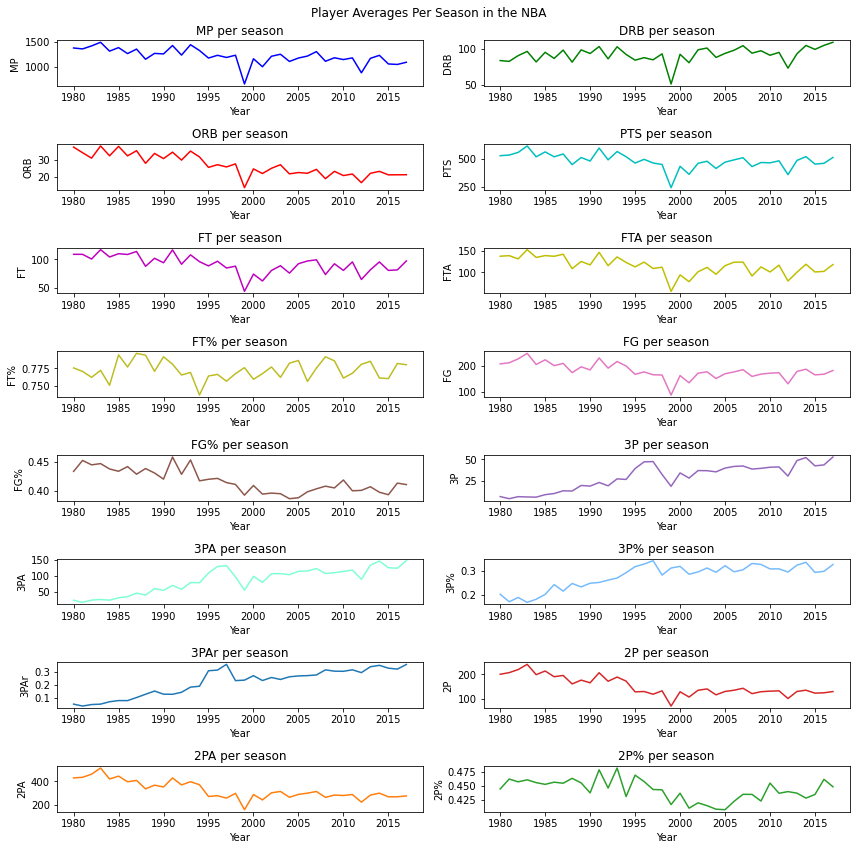

In [95]:
# PG plot
# plot
pg_figure = plot_avgs(pg_avgs, stat_columns, years)

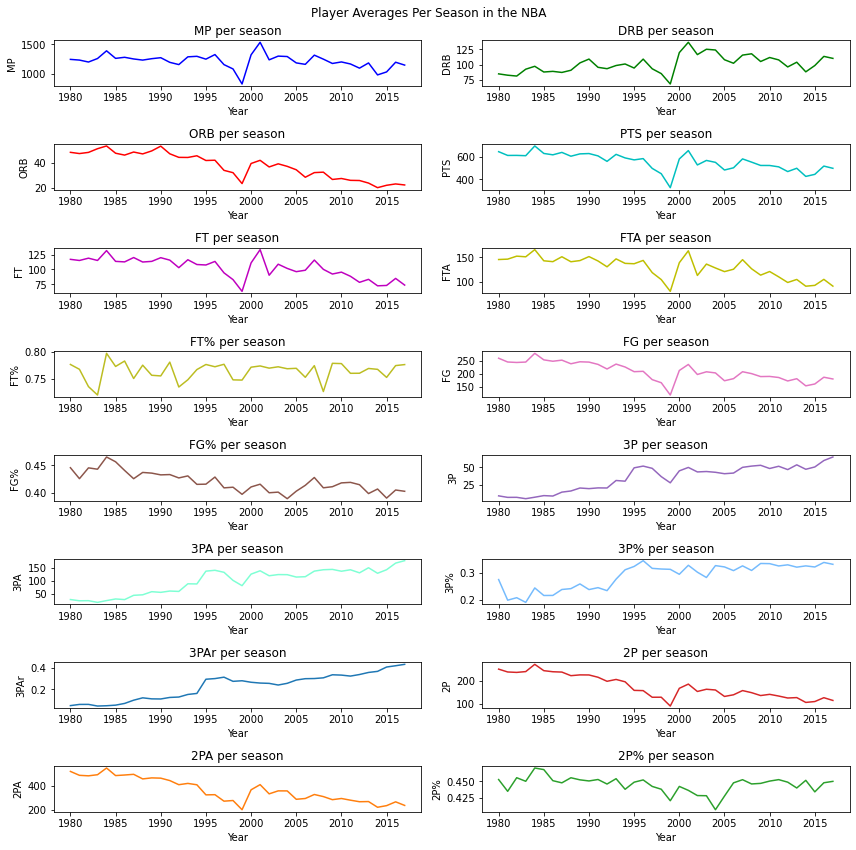

In [96]:
# SG plot

sg_figure = plot_avgs(sg_avgs, stat_columns, years)

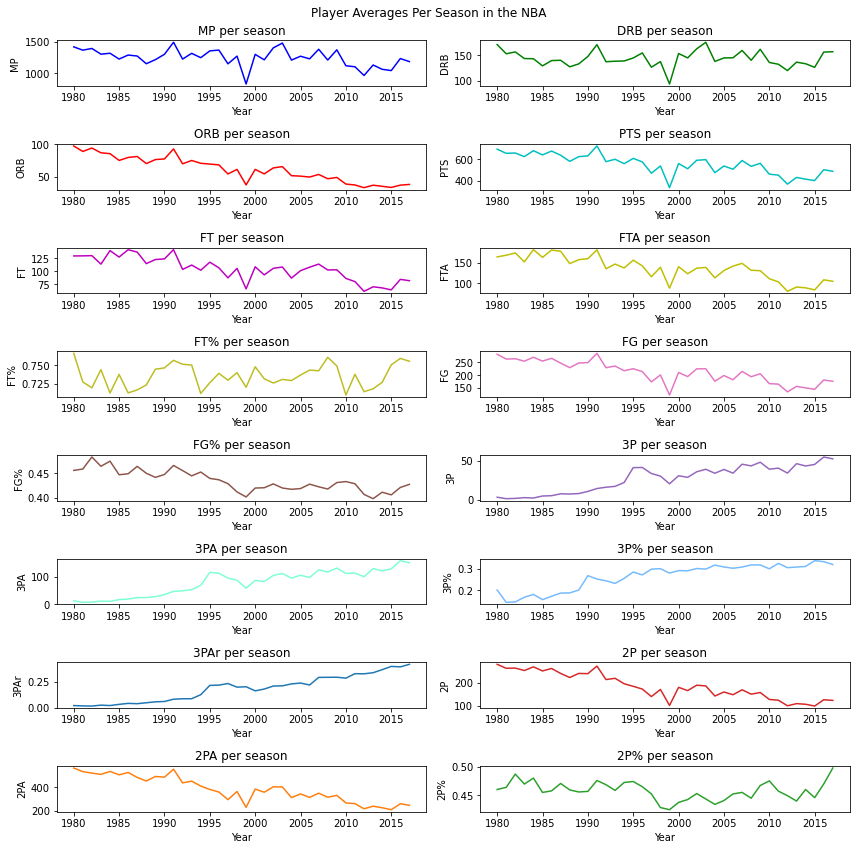

In [97]:
# SF plot

sf_figure = plot_avgs(sf_avgs, stat_columns, years)

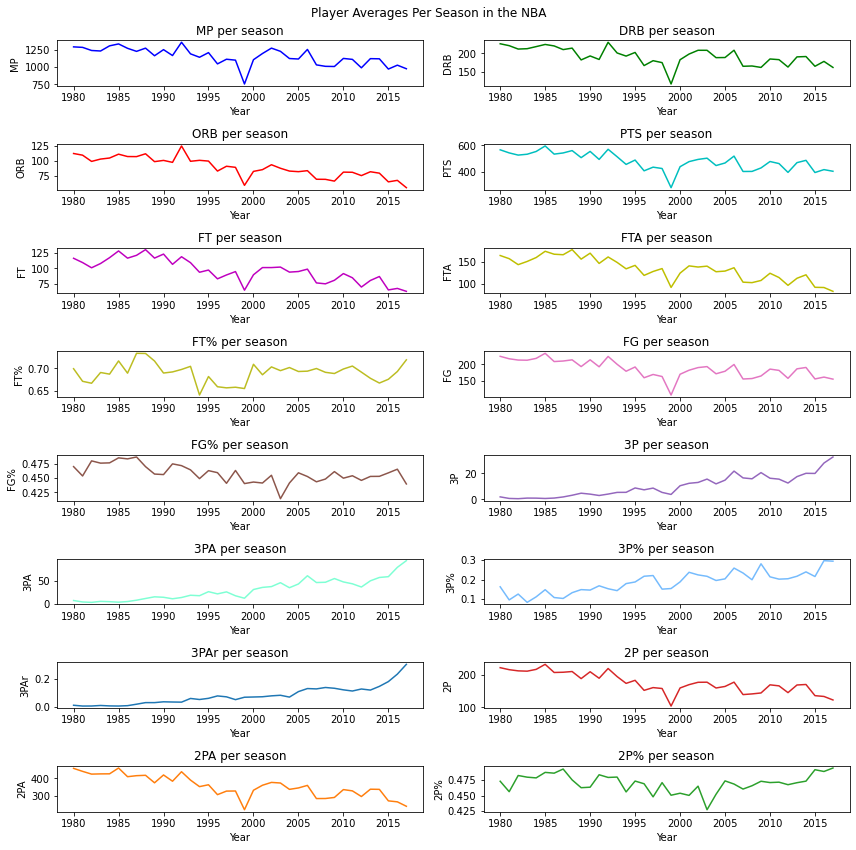

In [98]:
# PF plot

pf_figure = plot_avgs(pf_avgs, stat_columns, years)

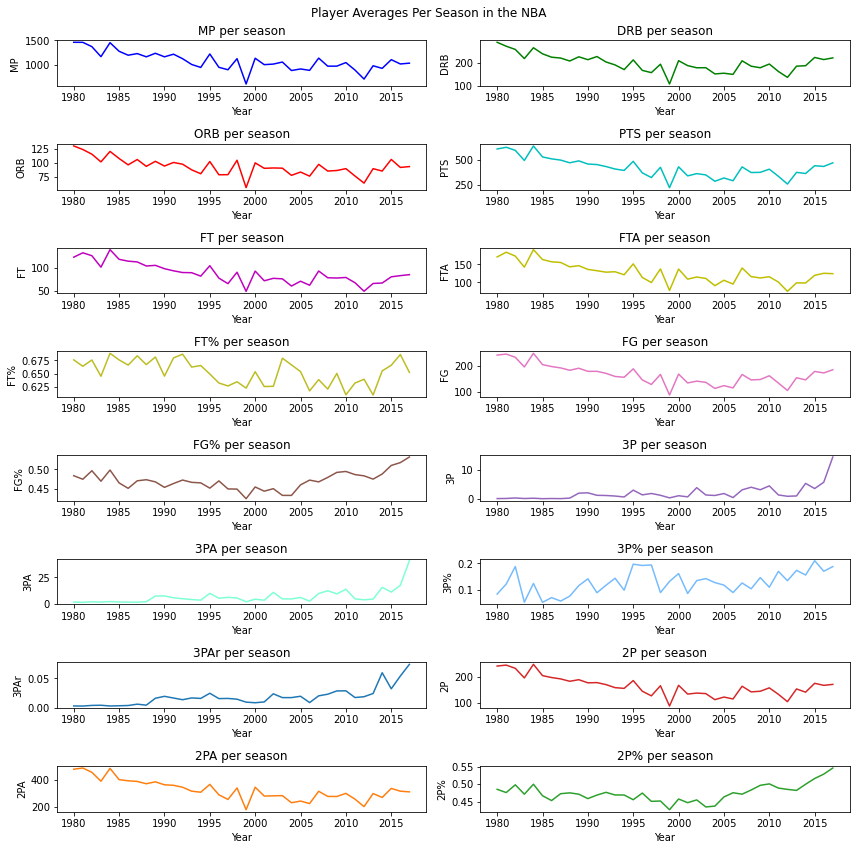

In [99]:
# C plot

c_figure = plot_avgs(c_avgs, stat_columns, years)

Text(0.5, 1.0, '2017 splits')

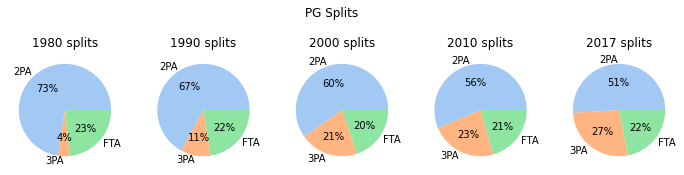

In [100]:
# pg
fig10 = plt.figure(figsize = (12,3))
plt.suptitle('PG Splits')

pg_stats80 = pg_data.iloc[0]
pg_stats_80 = pg_stats80[['2PA', '3PA', 'FTA']]

pg_stats90 = pg_data.iloc[10]
pg_stats_90 = pg_stats90[['2PA', '3PA', 'FTA']]

pg_stats00 = pg_data.iloc[20]
pg_stats_00 = pg_stats00[['2PA', '3PA', 'FTA']]

pg_stats10 = pg_data.iloc[30]
pg_stats_10 = pg_stats10[['2PA', '3PA', 'FTA']]

pg_stats17 = pg_data.iloc[-1]
pg_stats_17 = pg_stats17[['2PA', '3PA', 'FTA']]

plt.subplot(1,5,1)
plt.pie(pg_stats_80, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1980 splits')

plt.subplot(1,5,2)
plt.pie(pg_stats_90, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1990 splits')

plt.subplot(1,5,3)
plt.pie(pg_stats_00, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2000 splits')

plt.subplot(1,5,4)
plt.pie(pg_stats_10, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2010 splits')

plt.subplot(1,5,5)
plt.pie(pg_stats_17, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2017 splits')

Text(0.5, 1.0, '2017 splits')

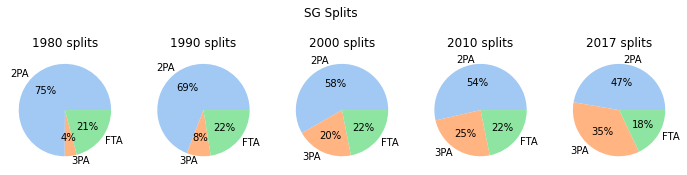

In [101]:
# sg
fig10 = plt.figure(figsize = (12,3))
plt.suptitle('SG Splits')

sg_stats80 = sg_data.iloc[0]
sg_stats_80 = sg_stats80[['2PA', '3PA', 'FTA']]

sg_stats90 = sg_data.iloc[10]
sg_stats_90 = sg_stats90[['2PA', '3PA', 'FTA']]

sg_stats00 = sg_data.iloc[20]
sg_stats_00 = sg_stats00[['2PA', '3PA', 'FTA']]

sg_stats10 = sg_data.iloc[30]
sg_stats_10 = sg_stats10[['2PA', '3PA', 'FTA']]

sg_stats17 = sg_data.iloc[-1]
sg_stats_17 = sg_stats17[['2PA', '3PA', 'FTA']]

plt.subplot(1,5,1)
plt.pie(sg_stats_80, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1980 splits')

plt.subplot(1,5,2)
plt.pie(sg_stats_90, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1990 splits')

plt.subplot(1,5,3)
plt.pie(sg_stats_00, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2000 splits')

plt.subplot(1,5,4)
plt.pie(sg_stats_10, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2010 splits')

plt.subplot(1,5,5)
plt.pie(sg_stats_17, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2017 splits')

Text(0.5, 1.0, '2017 splits')

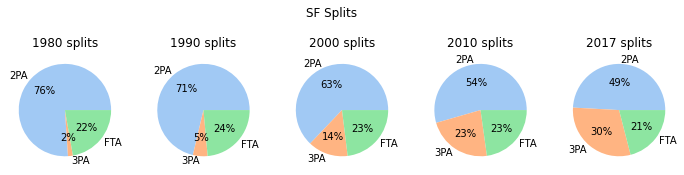

In [102]:
# sf
fig10 = plt.figure(figsize = (12,3))
plt.suptitle('SF Splits')

sf_stats80 = sf_data.iloc[0]
sf_stats_80 = sf_stats80[['2PA', '3PA', 'FTA']]

sf_stats90 = sf_data.iloc[10]
sf_stats_90 = sf_stats90[['2PA', '3PA', 'FTA']]

sf_stats00 = sf_data.iloc[20]
sf_stats_00 = sf_stats00[['2PA', '3PA', 'FTA']]

sf_stats10 = sf_data.iloc[30]
sf_stats_10 = sf_stats10[['2PA', '3PA', 'FTA']]

sf_stats17 = sf_data.iloc[-1]
sf_stats_17 = sf_stats17[['2PA', '3PA', 'FTA']]

plt.subplot(1,5,1)
plt.pie(sf_stats_80, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1980 splits')

plt.subplot(1,5,2)
plt.pie(sf_stats_90, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1990 splits')

plt.subplot(1,5,3)
plt.pie(sf_stats_00, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2000 splits')

plt.subplot(1,5,4)
plt.pie(sf_stats_10, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2010 splits')

plt.subplot(1,5,5)
plt.pie(sf_stats_17, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2017 splits')

Text(0.5, 1.0, '2017 splits')

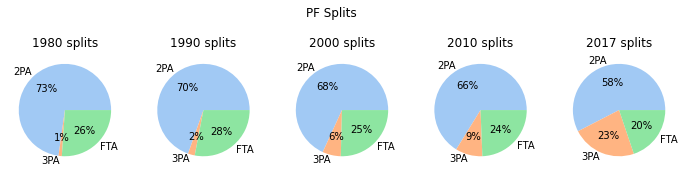

In [103]:
# pf
fig10 = plt.figure(figsize = (12,3))
plt.suptitle('PF Splits')

pf_stats80 = pf_data.iloc[0]
pf_stats_80 = pf_stats80[['2PA', '3PA', 'FTA']]

pf_stats90 = pf_data.iloc[10]
pf_stats_90 = pf_stats90[['2PA', '3PA', 'FTA']]

pf_stats00 = pf_data.iloc[20]
pf_stats_00 = pf_stats00[['2PA', '3PA', 'FTA']]

pf_stats10 = pf_data.iloc[30]
pf_stats_10 = pf_stats10[['2PA', '3PA', 'FTA']]

pf_stats17 = pf_data.iloc[-1]
pf_stats_17 = pf_stats17[['2PA', '3PA', 'FTA']]

plt.subplot(1,5,1)
plt.pie(pf_stats_80, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1980 splits')

plt.subplot(1,5,2)
plt.pie(pf_stats_90, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1990 splits')

plt.subplot(1,5,3)
plt.pie(pf_stats_00, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2000 splits')

plt.subplot(1,5,4)
plt.pie(pf_stats_10, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2010 splits')

plt.subplot(1,5,5)
plt.pie(pf_stats_17, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2017 splits')

Text(0.5, 1.0, '2017 splits')

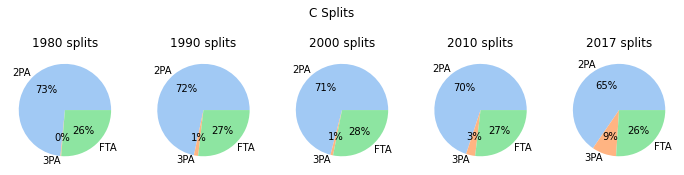

In [104]:
# c
fig10 = plt.figure(figsize = (12,3))
plt.suptitle('C Splits')

c_stats80 = c_data.iloc[0]
c_stats_80 = c_stats80[['2PA', '3PA', 'FTA']]

c_stats90 = c_data.iloc[10]
c_stats_90 = c_stats90[['2PA', '3PA', 'FTA']]

c_stats00 = c_data.iloc[20]
c_stats_00 = c_stats00[['2PA', '3PA', 'FTA']]

c_stats10 = c_data.iloc[30]
c_stats_10 = c_stats10[['2PA', '3PA', 'FTA']]

c_stats17 = c_data.iloc[-1]
c_stats_17 = c_stats17[['2PA', '3PA', 'FTA']]

plt.subplot(1,5,1)
plt.pie(c_stats_80, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1980 splits')

plt.subplot(1,5,2)
plt.pie(c_stats_90, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1990 splits')

plt.subplot(1,5,3)
plt.pie(c_stats_00, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2000 splits')

plt.subplot(1,5,4)
plt.pie(c_stats_10, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2010 splits')

plt.subplot(1,5,5)
plt.pie(c_stats_17, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2017 splits')

## Results

I set out to find how the game has changed beacuse of 3 pointers. Positions and play styles have both been affected. When it comes to the game as a whole, only 2% of shots in 1980 were 3s, and by the end of the decade, that number was only 6%. In 2017, it accounts for a quarter of all shots. The last 7 years have seen the most growth over any period, with an 8% increase in just 7 seasons.

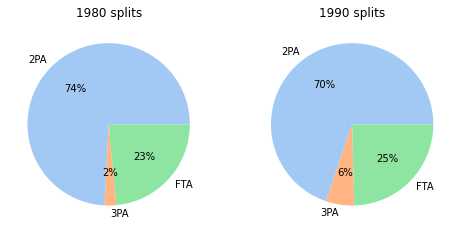

In [105]:
fig11 = plt.figure(figsize = (8,4))

stats80 = master_data.iloc[0]
stats_80 = stats80[['2PA', '3PA', 'FTA']]

stats90 = master_data.iloc[10]
stats_90 = stats90[['2PA', '3PA', 'FTA']]

plt.subplot(1,2,1)
plt.pie(stats_80, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1980 splits')

plt.subplot(1,2,2)
plt.pie(stats_90, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('1990 splits')

plt.show()

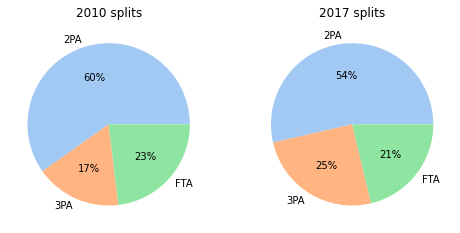

In [106]:
fig12 = plt.figure(figsize = (8,4))

stats10 = master_data.iloc[30]
stats_10 = stats10[['2PA', '3PA', 'FTA']]

stats17 = master_data.iloc[-1]
stats_17 = stats17[['2PA', '3PA', 'FTA']]

plt.subplot(1,2,1)
plt.pie(stats_10, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2010 splits')

plt.subplot(1,2,2)
plt.pie(stats_17, labels = ['2PA', '3PA', 'FTA'], colors = colors, autopct='%.0f%%')
plt.title('2017 splits')

plt.show()

Breaking down by position, shooting guards have become the most reliant on the 3 while also being the least reliant on 2s. Point guards generally have the most balanced shot selection out of all positions.
While centers are least reliant on the 3 ball, they have still seen a 6% increase over the last 7 years compared to growth of 3% the previous 30 years. Power forwards have seen the biggest explosion in 3s in recent memory. from 2010 to 2017, there was a 14% increase in 3s taken.

## Discussion and Conclusion

From the results, I learned that power forwards have evolved their games the most over the last 10 years. This is not what I had expected intially. However, when looking at the data correlations, there is a negative relationship between offensive rebounding and 3s. I assumed that meant a traditional rebounding position had potentially been changing. I ran into many obstacles. I had a hard time finding data that had all the statistics I was looking for. I considered combining multiple sets but fortunately found data that was sufficient. I found it diificult building my functions to manipulate the data as I wanted. Staying organized with all the different data structures I had was also hard to do. Next time I would spend more time and do a full analysis on how other stats had changed, not just 3s. There is no debating whether or not the 3 had changed basketball. It has however, changed at different rates depending on position. The game has changed drastically for power forwards. Their 3s attempted has increased by 14% in just 7 years. Centers have also seen growth relative to their history, with a 6% increase recently compared to 3% between 1980 and 2010.

### References

1. “Basketball Statistics &amp; History of Every Team &amp; NBA and WNBA Players.” Basketball, https://www.basketball-reference.com/. 

2. Goldstein, Omri. “NBA Players Stats since 1950.” Kaggle, 27 Apr. 2018, https://www.kaggle.com/datasets/drgilermo/nba-players-stats. 

3. “The History of the 3-Pointer.” USA Basketball, https://www.usab.com/youth/news/2011/06/the-history-of-the-3-pointer.aspx. 

4. Powell, Shaun, and Archive. “Stephen Curry Reached 'His Own Level' and Left behind a New-Look NBA.” Stephen Curry Reached 'His Own Level' and Left behind a New-Look NBA | NBA.com, https://www.nba.com/news/stephen-curry-changed-game-long-before-3-point-milestone. 